In [2]:
# imports
import numpy as np # generic math functions
import numpy.linalg as la
import time as time
#import scipy.linalg as linalg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

%load_ext autoreload
%autoreload 2
import qpdcsim as q

984


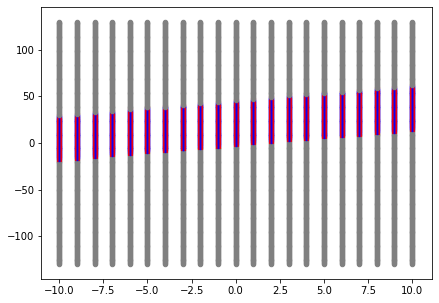

In [84]:
d=2 # physical Hilbert space dimension (2 for spin-1/2)
N=6 # level of rational approximation, frequencies = [1, F_{N+1}/F_N]
L=10 # horizontal length of truncated strip of frequency lattice

sim = q.FiboSim(d,N,L) # setup simulator object
print(sim.size)

sim.plot_freq_lattice()

In [74]:
# define the drive Hamiltonian interactions
pulse1 = q.Interaction({'type':'Gaussian', 
                     'operator':q.PAULI['X'], # 
                     'parameters': {'freq':0, # frequency axis 0 or 1
                                    'width':0.1, # stdev of Gaussian
                                    'weight':np.pi/2, # integrated weight
                                    'cutoff':5} # number of Fourier components (+/-) to truncate to
                     }
                    )
pulse2 = q.Interaction({'type':'Gaussian',
                     'operator':q.PAULI['Z'],
                     'parameters': {'freq':1,
                                    'width':0.1,
                                    'weight':1.0*np.pi/2,
                                    'cutoff':5}
                     }
                    )
# add the interactions to the simulator object (as list)
sim.interactions = [pulse1,pulse2]

# sweep over "flux" through compactified direction on Frequency lattice
# and compute quasi-energy spectrum
N_sweep = 1 # number of points to sweep
fluxes = np.linspace(-np.pi,np.pi,N_sweep) # fluxes to sweep over

Es =np.zeros([N_sweep,sim.Hsize]) # quasi-energy spectrum
for j in range(N_sweep):    
    Es[j,:],psi=sim.compute_spectrum(flux=fluxes[j])

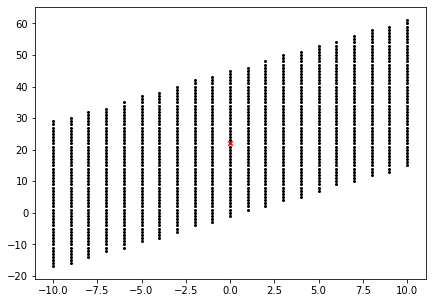

In [85]:
# visualize interactions
s1 = np.floor(sim.size/2) # pick a site in the middle of the strip
sim.plot_interactions(s1)

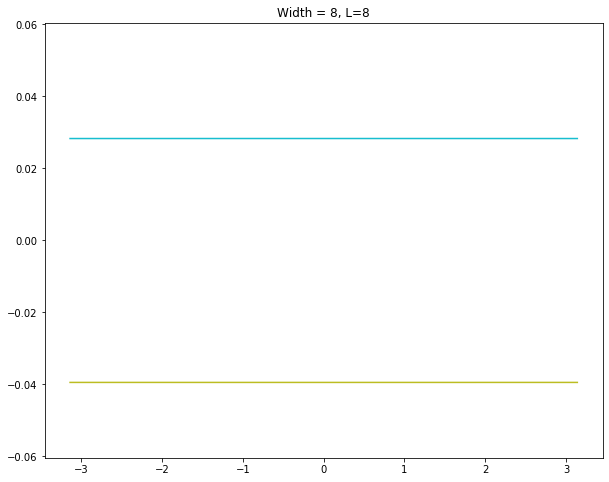

In [12]:
# simulate the quasi-energy spectrum
plt.figure()
ylim = np.pi/(q.Fibonacci(N+1)*q.Fibonacci(N))
plt.plot(fluxes,Es)
plt.ylim(-2*ylim,2*ylim)
plt.title('Width = %s' % q.Fibonacci(N) + ', L=%s'%L)
plt.show()

In [75]:
N_sweep = 31
weights = np.linspace(0,2,N_sweep)
psis = np.zeros([2*sim.size,2*sim.size,N_sweep])
Es = np.zeros([2*sim.size,N_sweep])
avg_ipr = np.zeros(N_sweep)
min_ipr = np.zeros(N_sweep)
var_ipr = np.zeros(N_sweep)
for j in range(N_sweep):
    
    # define the drive Hamiltonian interactions
    pulse1 = q.Interaction({'type':'Gaussian', 
                     'operator':q.PAULI['X'], # 
                     'parameters': {'freq':0, # frequency axis 0 or 1
                                    'width':0.1, # stdev of Gaussian
                                    'weight':weights[j]*np.pi/2, # integrated weight
                                    'cutoff':5} # number of Fourier components (+/-) to truncate to
                     }
                    )
    pulse2 = q.Interaction({'type':'Gaussian',
                     'operator':q.PAULI['Z'],
                     'parameters': {'freq':1,
                                    'width':0.1,
                                    'weight':weights[j]*np.pi/2,
                                    'cutoff':5}
                     }
                    )
    # add the interactions to the simulator object (as list)
    sim.interactions = [pulse1,pulse2]

    # sweep over "flux" through compactified direction on Frequency lattice
    # and compute quasi-energy spectrum
    E,psi=sim.compute_spectrum(flux=0)
#    jmin = np.argmin(np.abs(E)) # index of quasi-energy that's closest to 0
    ipr = np.sum(np.abs(psi)**4,1)
    avg_ipr[j] = np.mean(ipr)
    min_ipr[j] = np.min(ipr)
    var_ipr[j] = np.var(ipr)

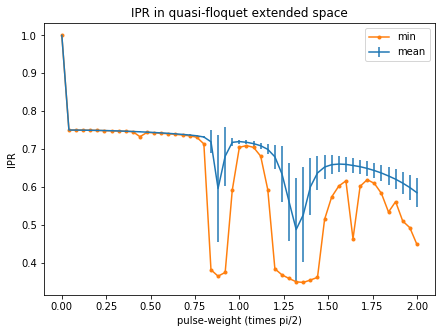

In [83]:
plt.errorbar(weights,avg_ipr,np.sqrt(var_ipr))
plt.plot(weights,min_ipr,'.-')
plt.legend(['min','mean'])
plt.xlabel('pulse-weight (times pi/2)')
plt.ylabel('IPR')
plt.title('IPR in quasi-floquet extended space')
plt.show()
#plt.plot(weights,np.sqrt(var_ipr))

## Sweep pulse-amplitudes and monitor IPR

In [51]:
d=2 # physical Hilbert space dimension (2 for spin-1/2)
N=6 # level of rational approximation, frequencies = [1, F_{N+1}/F_N]
L=15 # horizontal length of truncated strip of frequency lattice

sim = q.FiboSim(d,N,L) # setup simulator object
print(sim.size)
#sim.plot_freq_lattice()

1452


In [52]:
N_sweep = 11
cutoff = 30
width = 0.2
weights = np.linspace(0.5,1,N_sweep)
h=0.1 # constant field

# initialize
psis = np.zeros([2*sim.size,2*sim.size,N_sweep])
Es = np.zeros([2*sim.size,N_sweep])
avg_ipr = np.zeros(N_sweep)
min_ipr = np.zeros(N_sweep)
var_ipr = np.zeros(N_sweep)

for j in range(N_sweep):
    # define the drive Hamiltonian interactions
    pulse1 = q.Interaction({'type':'Gaussian', 
                     'operator':q.PAULI['X'], # 
                     'parameters': {'freq':0, # frequency axis 0 or 1
                                    'width':width, # stdev of Gaussian
                                    'weight':weights[j]*np.pi/2, # integrated weight
                                    'cutoff':cutoff} # number of Fourier components (+/-) to truncate to
                     }
                    )
    pulse2 = q.Interaction({'type':'Gaussian',
                     'operator':q.PAULI['Z'],
                     'parameters': {'freq':1,
                                    'width':width,
                                    'weight':weights[j]*np.pi/2,
                                    'cutoff':cutoff}
                     }
                    )
    field = q.Interaction({'type':'constant',
                          'operator':h*(q.PAULI['X']+q.PAULI['Y']+q.PAULI['Z'])/np.sqrt(3)
                          })
    # add the interactions to the simulator object (as list)
    sim.interactions = [pulse1,pulse2,field]

    # sweep over "flux" through compactified direction on Frequency lattice
    # and compute quasi-energy spectrum
    E,psi=sim.compute_spectrum(flux=0)
#    jmin = np.argmin(np.abs(E)) # index of quasi-energy that's closest to 0
    ipr = np.sum(np.abs(psi)**4,1)
    avg_ipr[j] = np.mean(ipr)
    min_ipr[j] = np.min(ipr)
    var_ipr[j] = np.var(ipr)

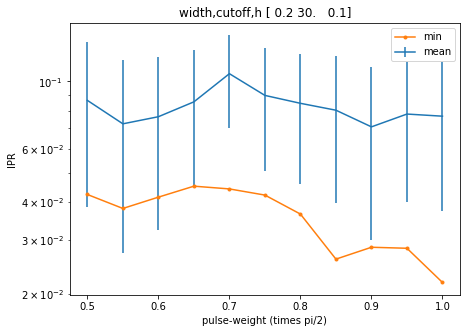

In [56]:
plt.errorbar(weights,avg_ipr,np.sqrt(var_ipr))
plt.plot(weights,min_ipr,'.-')
plt.legend(['min','mean'])
plt.xlabel('pulse-weight (times pi/2)')
plt.ylabel('IPR')
plt.title('IPR in quasi-floquet extended space')
#plt.ylim([1e-3,1])
plt.title('width,cutoff,h %s'%(np.array([width,cutoff,h])))
plt.yscale('log')
plt.show()
#plt.plot(weights,np.sqrt(var_ipr))

## Sweep Fibonacci approximant level 
 (at fixed other parameters)

In [46]:
# system sizes
d=2 # physical Hilbert space dimension (2 for spin-1/2)
Ns = [4,5,6,7,8,9] # level of rational approximation, frequencies = [1, F_{N+1}/F_N]
N_sweep = len(Ns) # number of sweep parameters
L=15 # horizontal length of truncated strip of frequency lattice
sims = []

# pulse parameters
cutoff = 30
width = 0.2
weight = 1.0 # weight (1.0=full pi-pulse)

# initialize
psis = [np.zeros([2*sim.size,2*sim.size]) for j in range(N_sweep)]
Es = [np.zeros([2*sim.size]) for j in range(N_sweep)]
avg_ipr = np.zeros(N_sweep)
min_ipr = np.zeros(N_sweep)
var_ipr = np.zeros(N_sweep)


for j in range(N_sweep):
    N = Ns[j]
    sims += [q.FiboSim(d,N,L)] # setup simulator object
    print('iteration: %s'%j,' fibonacci level: %s'%N,' sim size: %s'%sims[j].size)
    #sim.plot_freq_lattice()
    
    # define the drive Hamiltonian interactions
    pulse1 = q.Interaction({'type':'Gaussian', 
                     'operator':q.PAULI['X'], # 
                     'parameters': {'freq':0, # frequency axis 0 or 1
                                    'width':width, # stdev of Gaussian
                                    'weight':weight*np.pi/2, # integrated weight
                                    'cutoff':cutoff} # number of Fourier components (+/-) to truncate to
                     }
                    )
    pulse2 = q.Interaction({'type':'Gaussian',
                     'operator':q.PAULI['Z'],
                     'parameters': {'freq':1,
                                    'width':width,
                                    'weight':weight*np.pi/2,
                                    'cutoff':cutoff}
                     }
                    )
    # add the interactions to the simulator object (as list)
    sims[j].interactions = [pulse1,pulse2]
    
    Es[j],psis[j]=sims[j].compute_spectrum(flux=0)
    ipr = np.sum(np.abs(psis[j])**4,1)
    avg_ipr[j] = np.mean(ipr)
    min_ipr[j] = np.min(ipr)
    var_ipr[j] = np.var(ipr)

iteration: 0  fibonacci level: 4  sim size: 552
iteration: 1  fibonacci level: 5  sim size: 900
iteration: 2  fibonacci level: 6  sim size: 1452
iteration: 3  fibonacci level: 7  sim size: 2356
iteration: 4  fibonacci level: 8  sim size: 3812
iteration: 5  fibonacci level: 9  sim size: 6169


Text(0.5, 1.0, '(cutoff,width,weight): [30.   0.2  1. ]')

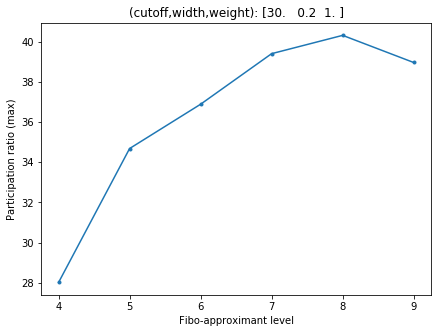

In [47]:
plt.plot(Ns,1/min_ipr,'.-')
plt.xlabel('Fibo-approximant level')
plt.ylabel('Participation ratio (max)')
plt.title('(cutoff,width,weight): %s'%(np.array([cutoff,width,weight])))

### try again with larger cutoff

iteration: 0  fibonacci level: 4  sim size: 552
iteration: 1  fibonacci level: 5  sim size: 900
iteration: 2  fibonacci level: 6  sim size: 1452
iteration: 3  fibonacci level: 7  sim size: 2356
iteration: 4  fibonacci level: 8  sim size: 3812
iteration: 5  fibonacci level: 9  sim size: 6169


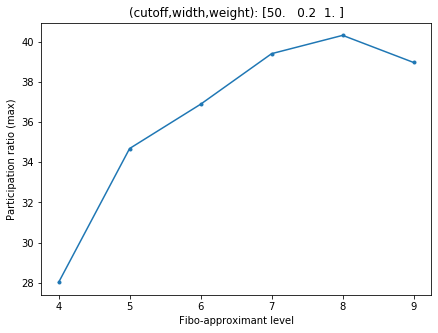

In [48]:
# system sizes
d=2 # physical Hilbert space dimension (2 for spin-1/2)
Ns = [4,5,6,7,8,9] # level of rational approximation, frequencies = [1, F_{N+1}/F_N]
N_sweep = len(Ns) # number of sweep parameters
L=15 # horizontal length of truncated strip of frequency lattice
sims = []

# pulse parameters
cutoff = 50
width = 0.2
weight = 1.0 # weight (1.0=full pi-pulse)

# initialize
psis = [np.zeros([2*sim.size,2*sim.size]) for j in range(N_sweep)]
Es = [np.zeros([2*sim.size]) for j in range(N_sweep)]
avg_ipr = np.zeros(N_sweep)
min_ipr = np.zeros(N_sweep)
var_ipr = np.zeros(N_sweep)


for j in range(N_sweep):
    N = Ns[j]
    sims += [q.FiboSim(d,N,L)] # setup simulator object
    print('iteration: %s'%j,' fibonacci level: %s'%N,' sim size: %s'%sims[j].size)
    #sim.plot_freq_lattice()
    
    # define the drive Hamiltonian interactions
    pulse1 = q.Interaction({'type':'Gaussian', 
                     'operator':q.PAULI['X'], # 
                     'parameters': {'freq':0, # frequency axis 0 or 1
                                    'width':width, # stdev of Gaussian
                                    'weight':weight*np.pi/2, # integrated weight
                                    'cutoff':cutoff} # number of Fourier components (+/-) to truncate to
                     }
                    )
    pulse2 = q.Interaction({'type':'Gaussian',
                     'operator':q.PAULI['Z'],
                     'parameters': {'freq':1,
                                    'width':width,
                                    'weight':weight*np.pi/2,
                                    'cutoff':cutoff}
                     }
                    )
    # add the interactions to the simulator object (as list)
    sims[j].interactions = [pulse1,pulse2]
    
    Es[j],psis[j]=sims[j].compute_spectrum(flux=0)
    ipr = np.sum(np.abs(psis[j])**4,1)
    avg_ipr[j] = np.mean(ipr)
    min_ipr[j] = np.min(ipr)
    var_ipr[j] = np.var(ipr)
    
plt.plot(Ns,1/min_ipr,'.-')
plt.xlabel('Fibo-approximant level')
plt.ylabel('Participation ratio (max)')
plt.title('(cutoff,width,weight): %s'%(np.array([cutoff,width,weight])))
plt.show()

## try with constant field added

iteration: 0  fibonacci level: 4  sim size: 552
iteration: 1  fibonacci level: 5  sim size: 900
iteration: 2  fibonacci level: 6  sim size: 1452
iteration: 3  fibonacci level: 7  sim size: 2356


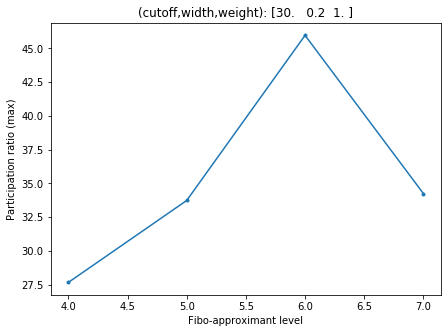

In [50]:
# system sizes
d=2 # physical Hilbert space dimension (2 for spin-1/2)
Ns = [4,5,6,7] # level of rational approximation, frequencies = [1, F_{N+1}/F_N]
N_sweep = len(Ns) # number of sweep parameters
L=15 # horizontal length of truncated strip of frequency lattice
sims = []

# pulse parameters
cutoff = 30
width = 0.2
weight = 1.0 # weight (1.0=full pi-pulse)
h = 0.1 # constant field

# initialize
psis = [np.zeros([2*sim.size,2*sim.size]) for j in range(N_sweep)]
Es = [np.zeros([2*sim.size]) for j in range(N_sweep)]
avg_ipr = np.zeros(N_sweep)
min_ipr = np.zeros(N_sweep)
var_ipr = np.zeros(N_sweep)


for j in range(N_sweep):
    N = Ns[j]
    sims += [q.FiboSim(d,N,L)] # setup simulator object
    print('iteration: %s'%j,' fibonacci level: %s'%N,' sim size: %s'%sims[j].size)
    #sim.plot_freq_lattice()
    
    # define the drive Hamiltonian interactions
    pulse1 = q.Interaction({'type':'Gaussian', 
                     'operator':q.PAULI['X'], # 
                     'parameters': {'freq':0, # frequency axis 0 or 1
                                    'width':width, # stdev of Gaussian
                                    'weight':weight*np.pi/2, # integrated weight
                                    'cutoff':cutoff} # number of Fourier components (+/-) to truncate to
                     }
                    )
    pulse2 = q.Interaction({'type':'Gaussian',
                     'operator':q.PAULI['Z'],
                     'parameters': {'freq':1,
                                    'width':width,
                                    'weight':weight*np.pi/2,
                                    'cutoff':cutoff}
                     }
                    )
    
    field = q.Interaction({'type':'constant',
                          'operator':h*(q.PAULI['X']+q.PAULI['Y']+q.PAULI['Z'])/np.sqrt(3)
                          })
    # add the interactions to the simulator object (as list)
    sims[j].interactions = [pulse1,pulse2,field]
    
    Es[j],psis[j]=sims[j].compute_spectrum(flux=0)
    ipr = np.sum(np.abs(psis[j])**4,1)
    avg_ipr[j] = np.mean(ipr)
    min_ipr[j] = np.min(ipr)
    var_ipr[j] = np.var(ipr)
    
plt.plot(Ns,1/min_ipr,'.-')
plt.xlabel('Fibo-approximant level')
plt.ylabel('Participation ratio (max)')
plt.title('(cutoff,width,weight): %s'%(np.array([cutoff,width,weight])))
plt.show()